## Instruction

Substrate-specific time series.

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

print("Pandas version:", pd.__version__)
print('Numpy version:',  np.__version__)
print('Scipy version:', scipy.__version__)
print('Matplotlib version:',  matplotlib.__version__)

Pandas version: 0.25.3
Numpy version: 1.18.2
Scipy version: 1.4.1
Matplotlib version: 3.1.3


## base

In [2]:
sub_base = pd.read_csv('Substrates_base_20201.csv',index_col=0)
sub_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
DeadMic,0.00,1.080315e+01,1.769644e+01,2.452482e+01,2.840405e+01,4.095286e+01,5.137788e+01,6.082774e+01,7.071252e+01,8.155568e+01,...,102705.96000,102604.130,102521.3800,102432.550,102313.7700,102203.5860,102128.93000,102076.5500,101990.94500,101909.1250
DeadEnz,0.00,0.000000e+00,4.756011e-01,1.399094e+00,2.745909e+00,4.494455e+00,6.625801e+00,9.123410e+00,1.197158e+01,1.515867e+01,...,4544.91060,4548.519,4551.4805,4555.750,4558.3810,4556.6284,4564.03370,4571.2437,4576.74300,4580.8696
Cellulose,1468900.00,1.468900e+06,1.468891e+06,1.468874e+06,1.468847e+06,1.468811e+06,1.468768e+06,1.468720e+06,1.468663e+06,1.468603e+06,...,647053.70000,645864.060,644656.2000,643500.800,642295.4000,640933.0600,639903.70000,638889.4000,637849.30000,636772.5000
Hemicellulose,858550.06,8.585501e+05,8.585315e+05,8.584979e+05,8.584419e+05,8.583696e+05,8.582821e+05,8.581860e+05,8.580697e+05,8.579489e+05,...,15571.68100,15350.495,15130.8820,14919.931,14706.9900,14482.4900,14293.59000,14107.7300,13919.94500,13731.0990
Starch,122100.00,1.221000e+05,1.220949e+05,1.220856e+05,1.220705e+05,1.220509e+05,1.220273e+05,1.220009e+05,1.219694e+05,1.219362e+05,...,724.38763,716.300,708.2731,700.540,692.7466,684.5755,677.59357,670.7105,663.75366,656.7660


In [3]:
sub_base = sub_base/10000
sub_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
DeadMic,0.000000,0.001080,0.001770,0.002452,0.002840,0.004095,0.005138,0.006083,0.007071,0.008156,...,10.270596,10.260413,10.252138,10.243255,10.231377,10.220359,10.212893,10.207655,10.199095,10.190912
DeadEnz,0.000000,0.000000,0.000048,0.000140,0.000275,0.000449,0.000663,0.000912,0.001197,0.001516,...,0.454491,0.454852,0.455148,0.455575,0.455838,0.455663,0.456403,0.457124,0.457674,0.458087
Cellulose,146.890000,146.890000,146.889090,146.887440,146.884660,146.881090,146.876760,146.872020,146.866280,146.860340,...,64.705370,64.586406,64.465620,64.350080,64.229540,64.093306,63.990370,63.888940,63.784930,63.677250
Hemicellulose,85.855006,85.855006,85.853150,85.849794,85.844190,85.836960,85.828206,85.818600,85.806970,85.794890,...,1.557168,1.535050,1.513088,1.491993,1.470699,1.448249,1.429359,1.410773,1.391995,1.373110
Starch,12.210000,12.210000,12.209494,12.208561,12.207048,12.205095,12.202727,12.200092,12.196945,12.193622,...,0.072439,0.071630,0.070827,0.070054,0.069275,0.068458,0.067759,0.067071,0.066375,0.065677


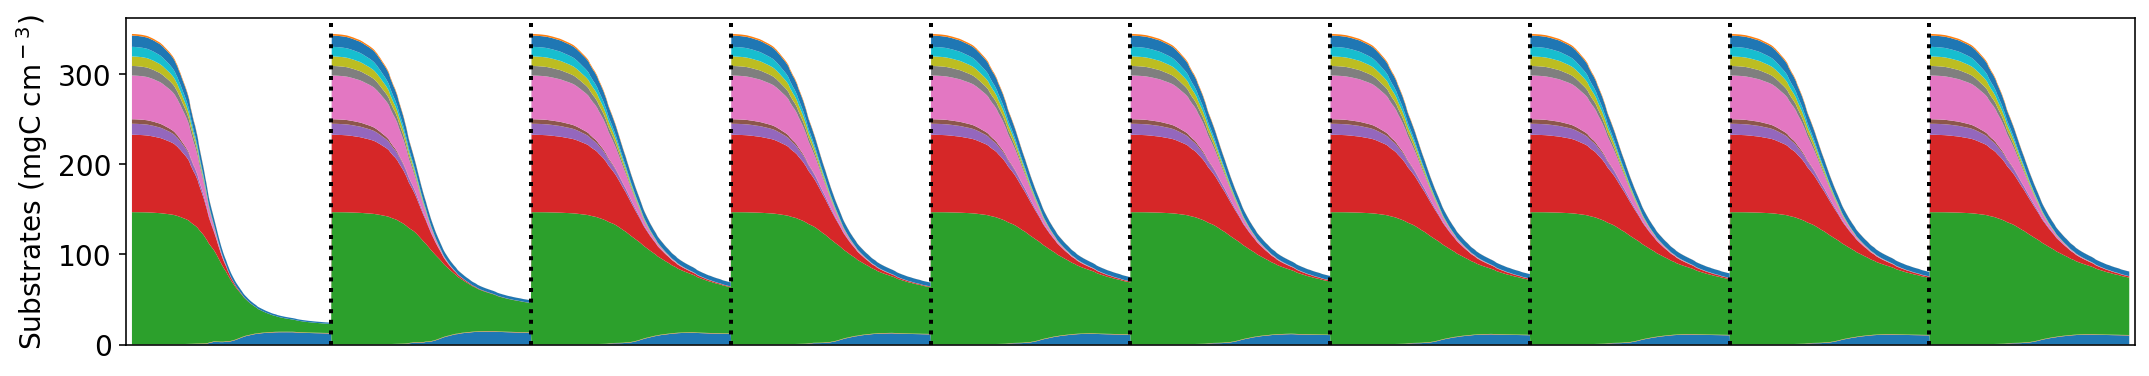

In [4]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)

plt.xlim(-10,365*10+10)
#plt.ylim(0,30)
#plt.xlabel('Year',size=14)
plt.ylabel('Substrates (mgC cm$^-$$^3$)',size=14)
#plt.title('Base',size=14)  

plt.stackplot(range(1,365*10+1),sub_base.iloc[:,1:])

for i in range(9):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
        
        
#plt.savefig('microbes_base.pdf',bbox_inches='tight')

plt.show()

## base_dis

In [5]:
sub_base_dis = pd.read_csv('Substrates_base_dis_20201.csv',index_col=0)
sub_base_dis = sub_base_dis/10000
sub_base_dis.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
DeadMic,0.000000,0.001080,0.001770,0.002452,0.002840,0.004095,0.005138,0.006083,0.007071,0.008156,...,9.532032,9.532326,9.532185,9.532667,9.532843,9.532898,9.533137,9.534084,9.534632,9.535456
DeadEnz,0.000000,0.000000,0.000048,0.000140,0.000275,0.000449,0.000663,0.000912,0.001197,0.001516,...,0.479427,0.479459,0.479474,0.479526,0.479534,0.479425,0.479559,0.479688,0.479773,0.479824
Cellulose,146.890000,146.890000,146.889090,146.887440,146.884660,146.881090,146.876760,146.872020,146.866280,146.860340,...,7.803988,7.794203,7.784476,7.775212,7.765814,7.755723,7.747610,7.739685,7.731695,7.723631
Hemicellulose,85.855006,85.855006,85.853150,85.849794,85.844190,85.836960,85.828206,85.818600,85.806970,85.794890,...,0.000379,0.000377,0.000375,0.000373,0.000371,0.000369,0.000367,0.000365,0.000364,0.000362
Starch,12.210000,12.210000,12.209494,12.208561,12.207048,12.205095,12.202727,12.200092,12.196945,12.193622,...,0.000043,0.000043,0.000043,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042


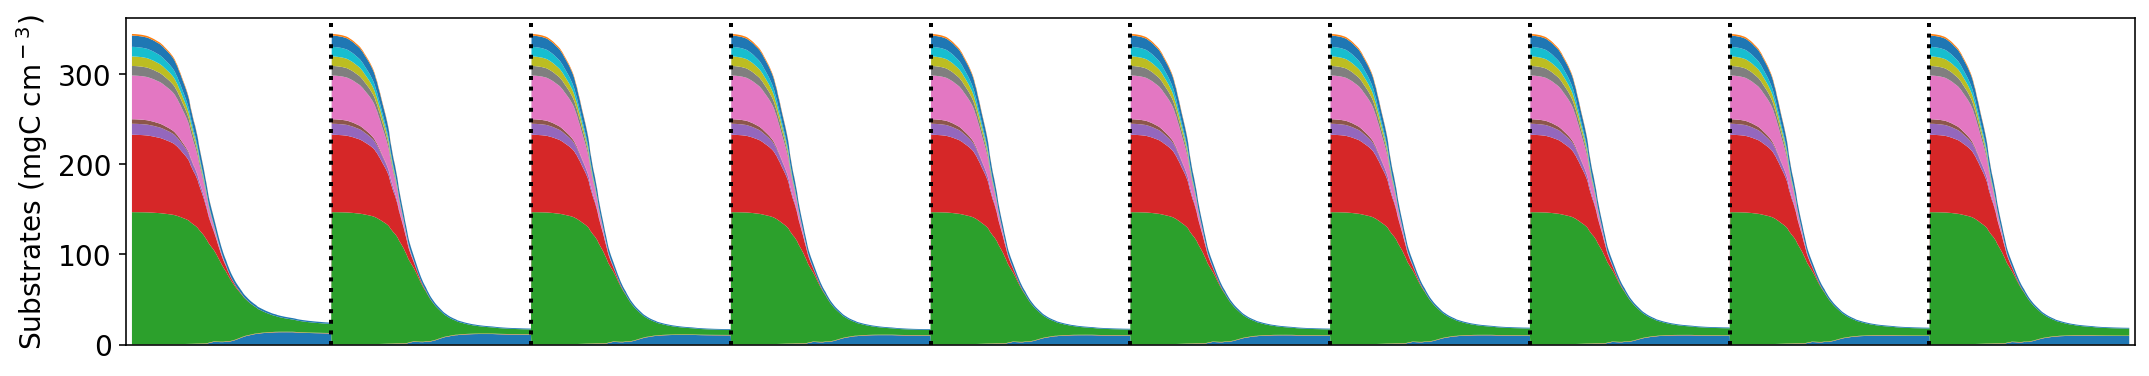

In [6]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)

plt.xlim(-10,365*10+10)
#plt.ylim(0,30)
#plt.xlabel('Year',size=14)
plt.ylabel('Substrates (mgC cm$^-$$^3$)',size=14)
#plt.title('Base',size=14)  

plt.stackplot(range(1,365*10+1),sub_base_dis.iloc[:,1:])

for i in range(9):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
        
        
#plt.savefig('microbes_base.pdf',bbox_inches='tight')

plt.show()

## base x 4

In [7]:
sub_basex4 = pd.read_csv('Substrates_basex4_20201.csv',index_col=0)
sub_basex4 = sub_basex4/10000
sub_basex4.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
DeadMic,0.000000,0.001080,0.001770,0.002452,0.002840,0.004095,0.005138,0.006083,0.007071,0.008156,...,4.372541,4.373121,4.375966,4.377925,4.379386,4.380819,4.382216,4.384604,4.385603,4.387060
DeadEnz,0.000000,0.000000,0.000048,0.000140,0.000275,0.000449,0.000663,0.000912,0.001197,0.001516,...,0.514167,0.514380,0.514533,0.514817,0.514945,0.514646,0.515247,0.515834,0.516258,0.516552
Cellulose,146.890000,146.890000,146.889090,146.887440,146.884660,146.881090,146.876760,146.872020,146.866280,146.860340,...,85.999375,85.879194,85.756710,85.639444,85.516506,85.376375,85.271510,85.168030,85.061630,84.951020
Hemicellulose,85.855006,85.855006,85.853150,85.849794,85.844190,85.836960,85.828206,85.818600,85.806970,85.794890,...,2.449244,2.414546,2.380028,2.346826,2.313244,2.277746,2.247894,2.218483,2.188719,2.158733
Starch,12.210000,12.210000,12.209494,12.208561,12.207048,12.205095,12.202727,12.200092,12.196945,12.193622,...,0.161265,0.159534,0.157813,0.156151,0.154473,0.152709,0.151201,0.149710,0.148201,0.146682


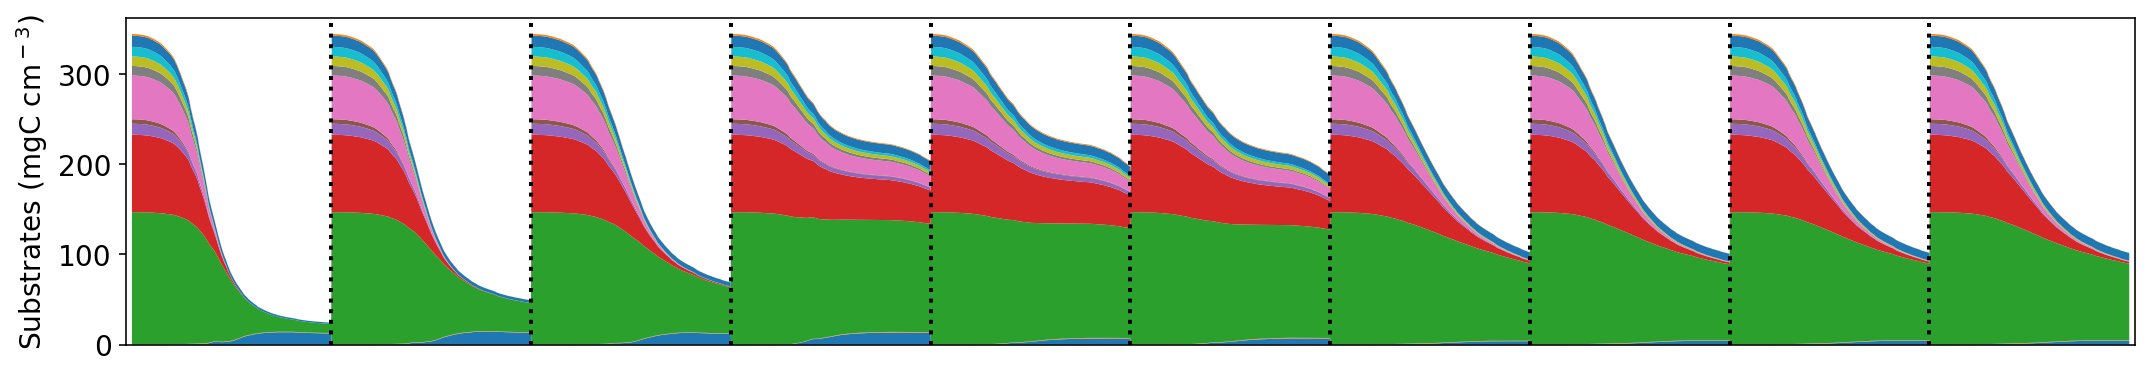

In [8]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)

plt.xlim(-10,365*10+10)
#plt.ylim(0,30)
#plt.xlabel('Year',size=14)
plt.ylabel('Substrates (mgC cm$^-$$^3$)',size=14)
#plt.title('Base',size=14)  

plt.stackplot(range(1,365*10+1),sub_basex4.iloc[:,1:])

for i in range(9):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
        
        
#plt.savefig('microbes_base.pdf',bbox_inches='tight')

plt.show()

## base x 10

In [9]:
sub_basex10 = pd.read_csv('Substrates_basex10_20201.csv',index_col=0)
sub_basex10 = sub_basex10/10000
sub_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
DeadMic,0.000000,0.001080,0.001770,0.002452,0.002840,0.004095,0.005138,0.006083,0.007071,0.008156,...,1.869431,1.869169,1.869138,1.869843,1.871298,1.873839,1.875293,1.877997,1.878763,1.878645
DeadEnz,0.000000,0.000000,0.000048,0.000140,0.000275,0.000449,0.000663,0.000912,0.001197,0.001516,...,0.406830,0.407497,0.408134,0.408826,0.409447,0.409877,0.410699,0.411512,0.412252,0.412932
Cellulose,146.890000,146.890000,146.889090,146.887440,146.884660,146.881090,146.876760,146.872020,146.866280,146.860340,...,135.289120,135.249850,135.209680,135.171240,135.130710,135.083940,135.049590,135.015660,134.980700,134.944150
Hemicellulose,85.855006,85.855006,85.853150,85.849794,85.844190,85.836960,85.828206,85.818600,85.806970,85.794890,...,35.284688,35.132306,34.977525,34.828440,34.673260,34.499953,34.364530,34.230370,34.092494,33.949925
Starch,12.210000,12.210000,12.209494,12.208561,12.207048,12.205095,12.202727,12.200092,12.196945,12.193622,...,3.811406,3.791684,3.771814,3.752544,3.732768,3.711418,3.693628,3.675948,3.657857,3.639375


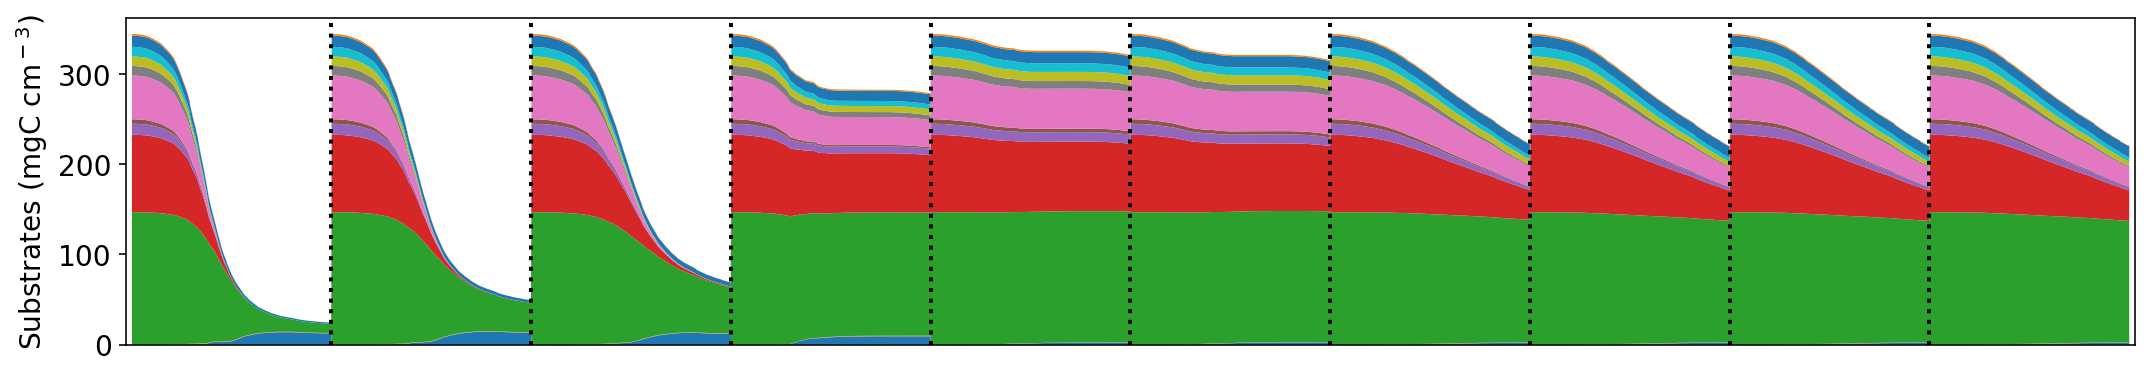

In [10]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)

plt.xlim(-10,365*10+10)
#plt.ylim(0,30)
#plt.xlabel('Year',size=14)
plt.ylabel('Substrates (mgC cm$^-$$^3$)',size=14)
#plt.title('Base',size=14)  

plt.stackplot(range(1,365*10+1),sub_basex10.iloc[:,1:])

for i in range(9):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
        
        
#plt.savefig('microbes_base.pdf',bbox_inches='tight')

plt.show()

## basex10_dis

In [11]:
sub_basex10_dis = pd.read_csv('Substrates_basex10_dis_20201.csv',index_col=0)
sub_basex10_dis = sub_basex10_dis/10000
sub_basex10_dis.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
DeadMic,0.000000,0.001080,0.001770,0.002452,0.002840,0.004095,0.005138,0.006083,0.007071,0.008156,...,8.650055,8.651328,8.651927,8.652466,8.653420,8.653304,8.654572,8.655367,8.656483,8.657445
DeadEnz,0.000000,0.000000,0.000048,0.000140,0.000275,0.000449,0.000663,0.000912,0.001197,0.001516,...,0.479451,0.479478,0.479488,0.479534,0.479537,0.479429,0.479553,0.479672,0.479750,0.479794
Cellulose,146.890000,146.890000,146.889090,146.887440,146.884660,146.881090,146.876760,146.872020,146.866280,146.860340,...,7.895933,7.886759,7.877649,7.868983,7.860201,7.850780,7.843217,7.835838,7.828405,7.820913
Hemicellulose,85.855006,85.855006,85.853150,85.849794,85.844190,85.836960,85.828206,85.818600,85.806970,85.794890,...,0.000292,0.000290,0.000289,0.000287,0.000286,0.000284,0.000283,0.000282,0.000281,0.000279
Starch,12.210000,12.210000,12.209494,12.208561,12.207048,12.205095,12.202727,12.200092,12.196945,12.193622,...,0.000036,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035


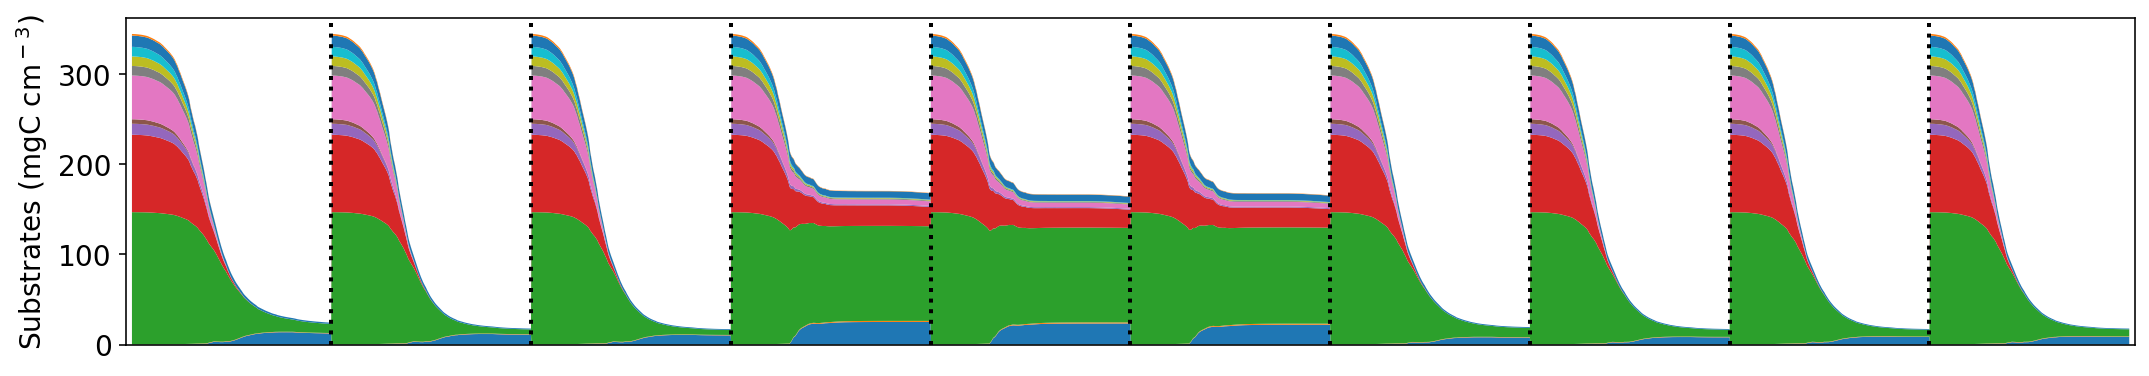

In [12]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)

plt.xlim(-10,365*10+10)
#plt.ylim(0,30)
#plt.xlabel('Year',size=14)
plt.ylabel('Substrates (mgC cm$^-$$^3$)',size=14)
#plt.title('Base',size=14)  

plt.stackplot(range(1,365*10+1),sub_basex10_dis.iloc[:,1:])

for i in range(9):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
        
        
#plt.savefig('microbes_base.pdf',bbox_inches='tight')

plt.show()

In [13]:
index_3   = [i for i in range(365*2+1,365*3+1)]
index_6   = [i for i in range(365*5+1,365*6+1)]
index_7   = [i for i in range(365*6+1,365*7+1)]
index_8   = [i for i in range(365*7+1,365*8+1)]
index_9   = [i for i in range(365*8+1,365*9+1)]
index_369 = index_3 + index_6 + index_7 + index_8 + index_9

In [14]:
sub_base369    = sub_base.iloc[:,index_369]
sub_basex4369  = sub_basex4.iloc[:,index_369]
sub_basex10369 = sub_basex10.iloc[:,index_369]

sub_base_dis369 = sub_base_dis.iloc[:,index_369]
sub_basex10_dis369 = sub_basex10_dis.iloc[:,index_369] # cumulative initialization


sub_base369.columns = sub_basex4369.columns = sub_basex10369.columns = \
sub_base_dis369.columns = sub_basex10_dis369.columns = \
[i for i in range(1,365*5+1)]

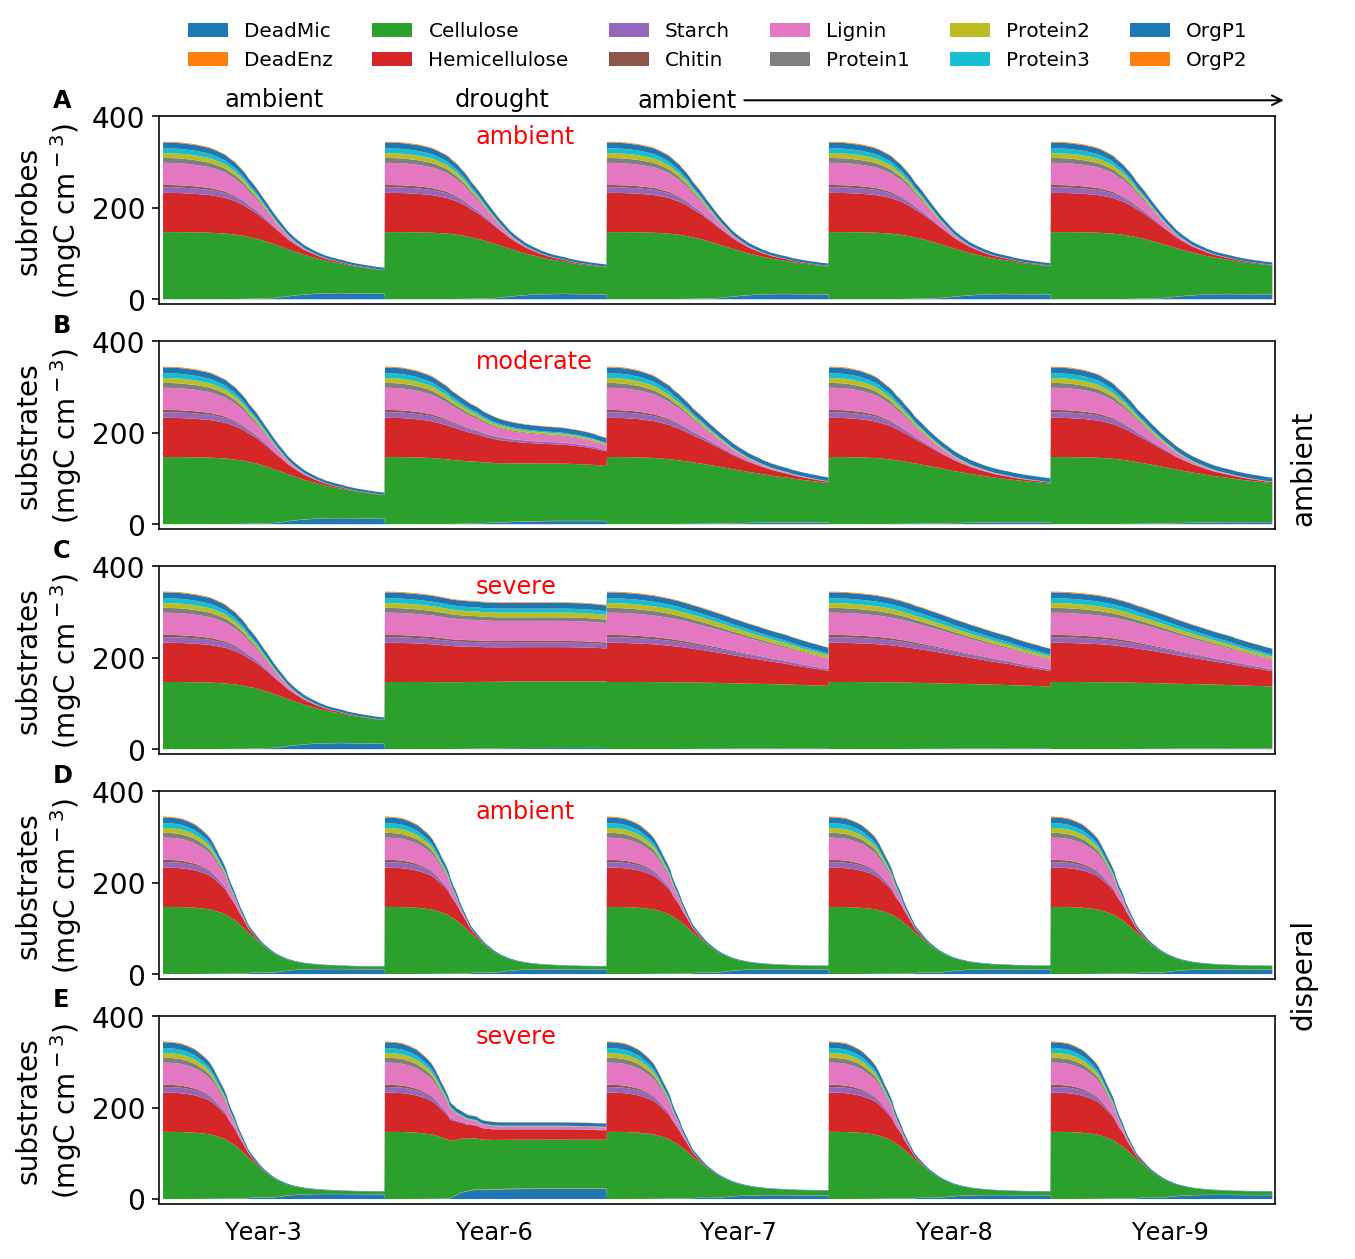

In [70]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(10,10))

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf', 'b',       'k']

labels = sub_base.index

ax1.set_xlim(-5,365*5+5)
ax1.set_ylim(-10,400)
ax1.set_ylabel('subrobes\n(mgC cm$^-$$^3$)',size=14)
ax1.tick_params(bottom=False,labelbottom=False)    
ax1.yaxis.set_tick_params(labelsize=14)
ax1.text(365+150,340,'ambient',fontsize=12,c='r')
ax1.text(-180,420,'A',fontsize=12,c='k',weight='heavy')

# ax1.stackplot(range(1,      365*1+1),sub_base369.iloc[:,0:365*1],    colors = new_colors)
# ax1.stackplot(range(365*1+1,365*2+1),sub_base369.iloc[:,365*1:365*2],colors = new_colors)
# ax1.stackplot(range(365*2+1,365*3+1),sub_base369.iloc[:,365*2:365*3],colors = new_colors)
# ax1.stackplot(range(365*3+1,365*4+1),sub_base369.iloc[:,365*3:365*4],colors = new_colors)
# ax1.stackplot(range(365*4+1,365*5+1),sub_base369.iloc[:,365*4:365*5],colors = new_colors)

ax1.stackplot(range(1,      365*5+1),sub_base369.iloc[:,0:365*5],labels=labels)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6), ncol=6, frameon=False)


ax2.set_xlim(-5,365*5+5)
ax2.set_ylim(-10,400)
#ax2.set_xlabel('Day',size=14)
ax2.set_ylabel('substrates\n(mgC cm$^-$$^3$)',size=14)
ax2.tick_params(bottom=False,labelbottom=False)    
ax2.yaxis.set_tick_params(labelsize=14)
ax2.text(365+150,340,'moderate',fontsize=12,c='r') #,ha='center', va='center')
ax2.text(-180,420,'B',fontsize=12,c='k',weight='heavy')

# ax2.stackplot(range(1,      365*1+1),sub_basex4369.iloc[:,0:365*1])
# ax2.stackplot(range(365*1+1,365*2+1),sub_basex4369.iloc[:,365*1:365*2])
# ax2.stackplot(range(365*2+1,365*3+1),sub_basex4369.iloc[:,365*2:365*3])
# ax2.stackplot(range(365*3+1,365*4+1),sub_basex4369.iloc[:,365*3:365*4])
# ax2.stackplot(range(365*4+1,365*5+1),sub_basex4369.iloc[:,365*4:365*5])
ax2.stackplot(range(365*0+1, 365*5+1),sub_basex4369.iloc[:,0:365*5])

ax3.set_xlim(-5,365*5+5)
ax3.set_ylim(-10,400)
#ax3.set_xlabel('Day',size=14)
ax3.set_ylabel('substrates\n(mgC cm$^-$$^3$)',size=14)
ax3.tick_params(bottom=False,labelbottom=False)    
ax3.yaxis.set_tick_params(labelsize=14)
ax3.text(365+150,340,'severe',fontsize=12,c='r') #,ha='center', va='center')
ax3.text(-180,420,'C',fontsize=12,c='k',weight='heavy')

# ax3.stackplot(range(1,      365*1+1),sub_basex10369.iloc[:,0:365*1])
# ax3.stackplot(range(365*1+1,365*2+1),sub_basex10369.iloc[:,365*1:365*2])
# ax3.stackplot(range(365*2+1,365*3+1),sub_basex10369.iloc[:,365*2:365*3])
# ax3.stackplot(range(365*3+1,365*4+1),sub_basex10369.iloc[:,365*3:365*4])
# ax3.stackplot(range(365*4+1,365*5+1),sub_basex10369.iloc[:,365*4:365*5])
ax3.stackplot(range(365*0+1,365*5+1),sub_basex10369.iloc[:,0:365*5])

ax4.set_xlim(-5,365*5+5)
ax4.set_ylim(-10,400)
#ax3.set_xlabel('Day',size=14)
ax4.set_ylabel('substrates\n(mgC cm$^-$$^3$)',size=14)
ax4.tick_params(bottom=False,labelbottom=False)    
ax4.yaxis.set_tick_params(labelsize=14)
ax4.text(365+150,340,'ambient',fontsize=12,c='r') #,ha='center', va='center')
ax4.text(-180,420,'D',fontsize=12,c='k',weight='heavy')

# ax4.stackplot(range(1,      365*1+1),sub_base_dis369.iloc[:,0:365*1])
# ax4.stackplot(range(365*1+1,365*2+1),sub_base_dis369.iloc[:,365*1:365*2])
# ax4.stackplot(range(365*2+1,365*3+1),sub_base_dis369.iloc[:,365*2:365*3])
# ax4.stackplot(range(365*3+1,365*4+1),sub_base_dis369.iloc[:,365*3:365*4])
# ax4.stackplot(range(365*4+1,365*5+1),sub_base_dis369.iloc[:,365*4:365*5])

ax4.stackplot(range(365*0+1,365*5+1),sub_base_dis369.iloc[:,0:365*5])

ax5.set_xlim(-5,365*5+5)
ax5.set_ylim(-10,400)
#ax5.set_xlabel('Day',size=14)
ax5.set_ylabel('substrates\n(mgC cm$^-$$^3$)',size=14)
ax5.tick_params(bottom=False,labelbottom=False)    
ax5.yaxis.set_tick_params(labelsize=14)
ax5.text(365+150,340,'severe',fontsize=12,c='r') #,ha='center', va='center')
ax5.text(-180,420,'E',fontsize=12,c='k',weight='heavy')

# ax5.stackplot(range(1,      365*1+1),sub_basex10_dis369.iloc[:,0:365*1])
# ax5.stackplot(range(365*1+1,365*2+1),sub_basex10_dis369.iloc[:,365*1:365*2])
# ax5.stackplot(range(365*2+1,365*3+1),sub_basex10_dis369.iloc[:,365*2:365*3])
# ax5.stackplot(range(365*3+1,365*4+1),sub_basex10_dis369.iloc[:,365*3:365*4])
# ax5.stackplot(range(365*4+1,365*5+1),sub_basex10_dis369.iloc[:,365*4:365*5])

ax5.stackplot(range(365*0+1,365*5+1),sub_basex10_dis369.iloc[:,0:365*5])

plt.figtext(0.17,0.887,'ambient',fontsize=12,weight='normal',c='k')
plt.figtext(0.33,0.887,'drought',fontsize=12,weight='normal',c='k')
#plt.figtext(0.47,0.89,'ambient',fontsize=12,weight='normal',c='k')
#plt.annotate("ambient",fontsize=12,xy=(0.17,0.92),xytext=(0.17,0.92), xycoords='figure fraction')
plt.annotate("ambient", fontsize=12,xy=(0.95,0.92), xytext=(0.47,0.92),xycoords='figure fraction',
             arrowprops=dict(arrowstyle="->"),va='center')

plt.figtext(0.91,0.60,'ambient', fontsize=14,weight='normal',c='k',rotation=90)
plt.figtext(0.91,0.25,'disperal',fontsize=14,weight='normal',c='k',rotation=90)

plt.figtext(0.17,0.10,'Year-3',fontsize=12)
plt.figtext(0.33,0.10,'Year-6',fontsize=12)
plt.figtext(0.50,0.10,'Year-7',fontsize=12)
plt.figtext(0.65,0.10,'Year-8',fontsize=12)
plt.figtext(0.80,0.10,'Year-9',fontsize=12)

plt.subplots_adjust(hspace=0.2)

#plt.savefig('../figures/substrates.pdf',bbox_inches='tight')

plt.show()